# SMS Spam Detector

The goal here is to explain the approach to detect SMS spams using the SMS Spam Collection Dataset on Kaggle that can be found here: https://www.kaggle.com/uciml/sms-spam-collection-dataset

Labels in the data set are _ham_ meaning not spam, and _spam_.


## Theoretical Background

Here I will briefly decribe the theoretical background needed for developing the Spam Detector:

### Naive Bayes Concepts

Based on Bayes rule we have:
$$p(y|x) = \frac{p(x,y)}{p(x)}$$

Here $x$ represents the input feature, and the $y$ represents the output feature.

#### Manipulating the Bayes rule:

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)}$$

where: 
* $p(y|x)$ is the _posterior probability_ of $y$ given $x$ which is the distribution of the target given the input. 
* $p(x|y)$ is referred to as the _likelihood_ of $x$ given $y$, this is what the data looks like given the class y. For example, the distribution of the input for spam emails is probably different from the distribution of the input for non-spam emails.
* $p(y)$ is the _prior_ probability of $y$. This is our best guess about $y$ if we have no information about $x$, which is for example the total proportion of spam/not-spam emails.
* and $p(x)$ represents the _evidence_.

Examples: 
* $p(y|x)$ - probability of seeing word "insurance" if spam = 90%
* $p(y)$ - probability that any email is spam = 40%

Note that the $p(y|x)$ actually represents multiple values: e.g., $p(y=spam |x)$, $p(y= not spam |x)$.

In general, we can use the "argmax". We can also drop the $p(x)$ since it doesn't depend on y:

$$ k^* = argmax_k \{p(y=k|x)\}$$

$$ k^* = argmax_k \{\frac{p(x|y=k)p(y=k)}{p(x)}\}$$ 

$$ k^* = argmax_k \{p(x|y=k)p(y=k)\}$$

having $ k^* = argmax_k \{p(x|y=k)p(y=k)\}$, we need to calculate the likelihood and the prior probabilities:

* Prior Probabilities:
$$p(y=spam) = \frac{\#\;spam\;emails}{\#\;total\;emails}$$

$$p(y=not\;spam) = \frac{\#\;not\;spam\;emails}{\#\;total\;emails}$$

* Likelihood: we can choose a likelihood distribution that's appropriate for our feature vectors. For example, if we have real-valued/bell-curved feature vectors we should choose a Gaussian likelihood. If the data follows a multinomial distribution you should use a multinomial likelihood. Or if the data is binary you should choose the Bernoulli distribution.

#### The Naive Assumption

The "Naive" in Naive Bayes Networks comes from the fact that we assume each component of the feature vector is independent given $y$.

If 2 components A and B are independent then $p(A,B) = p(A)p(B)$. Therefore:
$$p(x|y) = \prod_{d=1}^{D}p(x_d|y)$$

The Naive assumption is not technically true in our example of spam detection as word frequencies are not independent of each other: e.g., if an email contains "insurance" it most probable that it also include "loan" and "money". However, Naive Bayes works very well with word frequencies.

## Installations and Usage Giudelines
For this project I have been using the Anaconda distribution version 1.9.6 with python version 3.6.8. However, the normal installation of python should also work.

Here you may find the required modules that have been used in this project. The codes are written in Python 3.

In the following you may find the library versions that are used:

In [34]:
import future
import builtins
import numpy
import pandas
import sklearn
import wordcloud
import matplotlib
import sys

In [35]:
modules = list(set(sys.modules) & set(globals()))
for module_name in modules:
    module = sys.modules[module_name]
    print(module_name, getattr(module, '__version__', 'unknown'))

sys unknown
pandas 0.23.4
sklearn 0.20.1
builtins unknown
future 0.17.1
matplotlib 3.0.2
wordcloud 1.5.0
__future__ unknown
numpy 1.15.4


To install Future:
```
conda install -c anaconda future 
```

To install wordcloud:
```
conda install -c conda-forge wordcloud
```

In [22]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Data
The dataset is downloaded from https://www.kaggle.com/uciml/sms-spam-collection-dataset

* The file contains some invalid chars

In [5]:
# data includes some special characters therefore, it is necessary to use an encoding
data = pd.read_csv('Data\spam.csv', encoding='ISO-8859-1')

# Drop unnecessary columns
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

# Renaming columns to meaningful names
data.columns = ['labels', 'data']

In [6]:
data.head(3)

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


The labels are binary, therefore, we encode the labels ham to 0 and spam to 1.

In [7]:
data['binary_labels'] = data['labels'].map({'ham':0, 'spam':1})

## Extracting Test and Training Data

In [19]:
# Creating the target variable
y = data['binary_labels']

# Creating the features with two approaches:

# Using word counts
count_vectorizer = CountVectorizer(decode_error='ignore')
X_counts = count_vectorizer.fit_transform(data['data'])

# Using TFIDF
tfidf = TfidfVectorizer(decode_error='ignore')
X_tfidf = tfidf.fit_transform(data['data'])

# Spliting the data into train and test
X_count_train, X_count_test, y_count_train, y_count_test = train_test_split(X_counts, y, test_size=0.3, random_state=101)
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=101)

## Modelling


### Naive Bayes Model

In [21]:
# Creating the model
NB_count_model = MultinomialNB()
NB_tfidf_model = MultinomialNB()

# Fitting the model with word count features
NB_count_model.fit(X_count_train, y_count_train)
# Fitting the model with tfidf features
NB_tfidf_model.fit(X_tfidf_train, y_tfidf_train)

# Printing the scores of the word count Naive Bayes model
print('Naive Bayes Model based on word counts:')
print("Train score: %2.2f" % NB_count_model.score(X_count_train, y_count_train))
print("Test score: %2.2f" % NB_count_model.score(X_count_test, y_count_test))

# Printing the scores of the tfidf Naive Bayes model
print('Naive Bayes Model based on tfidf:')
print("Train score: %2.2f" % NB_tfidf_model.score(X_tfidf_train, y_tfidf_train))
print("Test score: %2.2f" % NB_tfidf_model.score(X_tfidf_test, y_tfidf_test))

Naive Bayes Model based on word counts:
Train score: 0.99
Test score: 0.99
Naive Bayes Model based on tfidf:
Train score: 0.96
Test score: 0.96


Let's see what we are getting wrong

In [28]:
data['NB_count_predictions'] = NB_count_model.predict(X_counts)

# Extracting the messegaes that should have been spam
sneaky_spam = data[(data['NB_count_predictions'] == 0) & (data['binary_labels'] == 1)]['data']
for message in sneaky_spam:
    print(message)
    print('-----------------')

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
-----------------
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
-----------------
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
-----------------
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
-----------------
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
-----------------
For sale - arsenal dartboard. Good condition but no doubles or trebles!
-----------------
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
-----------------
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you 

In [29]:
# things that should have not been spam
not_actually_spam = data[(data['NB_count_predictions'] == 1) & (data['binary_labels'] == 0)]['data']
for message in not_actually_spam:
    print(message)
    print('-----------------')

No calls..messages..missed calls
-----------------
No calls..messages..missed calls
-----------------
Waiting for your call.
-----------------
26th OF JULY
-----------------
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
-----------------
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
-----------------
Host-based IDPS for linux systems.
-----------------
Total video converter free download type this in google search:)
-----------------
No calls..messages..missed calls
-----------------
Audrie lousy autocorrect
-----------------
Waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,Zindgi wo nahi he jo hum sochte hai Zindgi wo hai jo ham jeetey hai..........
-----------------
Ultimately tor motive tui achieve korli.
-----------------
Unlimited texts. Limited minutes.
-----------------
Mathews or tait or edwards or anderson
-----------------
Gettin rdy to ship comp
-----------------
Have you laid your airtel li

## Visualizing the Word Clouds 

Here we are going to visualize the spam/not spam messages in the form of word clouds.

In [23]:
# visualize the data
def visualize(label):
    words = ''
    for message in data[data['labels'] == label]['data']:
        message = message.lower()
        words += message + ' '
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

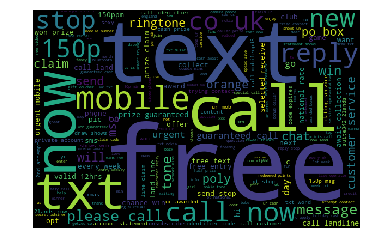

In [24]:
visualize('spam')

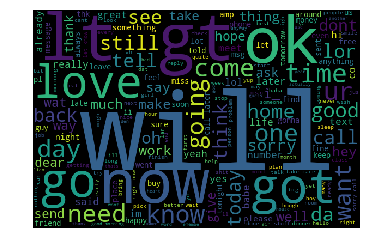

In [25]:
visualize('ham')